In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sat Oct  1 09:13:37 2022

@author: Yash Pungaliya
"""

#Singualrity :- the column which have 85% or more same value do not  predictive values
#Steps in EDA : 1)Correlation 2)Outliers using Boxplot 3)Normalization check using histogram 4)Checking and fixing null values
#Linear Regression
#Dataset : - Concrete 

#import libraries
import pandas as pd 
import numpy as np 
import statsmodels.api as sm  #OLS model
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats  as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn import preprocessing # data transformation
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor as rfr


In [4]:
#read data
filename = "C:/Users/Yash Pungaliya/Desktop/class/Linear Regression/concrete.csv"
conc = pd.read_csv(filename)
print (conc.head)



<bound method NDFrame.head of       cementcomp   slag  flyash  water  superplastisizer  coraseaggr  \
0          540.0    0.0     0.0  162.0               2.5      1040.0   
1          540.0    0.0     0.0  162.0               2.5      1055.0   
2          332.5  142.5     0.0  228.0               0.0       932.0   
3          332.5  142.5     0.0  228.0               0.0       932.0   
4          198.6  132.4     0.0  192.0               0.0       978.4   
...          ...    ...     ...    ...               ...         ...   
1025       276.4  116.0    90.3  179.6               8.9       870.1   
1026       322.2    0.0   115.6  196.0              10.4       817.9   
1027       148.5  139.4   108.6  192.7               6.1       892.4   
1028       159.1  186.7     0.0  175.6              11.3       989.6   
1029       260.9  100.5    78.3  200.6               8.6       864.5   

      finraggr  age    CCS  
0        676.0   28  79.99  
1        676.0   28  61.89  
2        594.0  27

In [5]:
conc.isnull().sum()
conc[conc==0].count()

#summary of the data
conc.describe()

#check for outliers in age
conc.age.describe()

#extract 'Y' variable from 
Y = "CCS"
features = list(conc.columns)
features.remove(Y)
features


['cementcomp',
 'slag',
 'flyash',
 'water',
 'superplastisizer',
 'coraseaggr',
 'finraggr',
 'age']

In [6]:
trainx,testx,trainY,testY = train_test_split(conc.drop(Y,1),conc[Y],test_size=0.25)

C:\Users\YASHPU~1\AppData\Local\Temp/ipykernel_9808/4083608486.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainx,testx,trainY,testY = train_test_split(conc.drop(Y,1),conc[Y],test_size=0.25)


In [7]:
print("trainx={} , trainY = {}".format(trainx.shape,trainY.shape))
print("testX={} , testY = {}".format(testx.shape,testY.shape))


trainx=(772, 8) , trainY = (772,)
testX=(258, 8) , testY = (258,)


In [8]:
#Build The Models 
#1)OLS
model_lr = sm.OLS(trainY,trainx).fit()


In [9]:
#2)Decision Tree Regressor
m_dt = dtr(criterion="mse",min_samples_leaf=3,max_depth=6).fit(trainx,trainY)

In [11]:
#3)Random Forest Regressor 
m_rf = rfr(max_features=2,n_estimators =20).fit(trainx,trainY)

In [13]:
#Predict 
p_lr = np.round(model_lr.predict(testx),2)
p_dt = np.round(m_dt.predict(testx),2)
p_rf = np.round(m_rf.predict(testx),2)

In [14]:
def getErr(act,pred):
    mse= np.round(mean_squared_error(act,pred),4)
    rmse= np.round(np.sqrt(mse),4)
    
    return(mse,rmse)

In [15]:
mse_lr,rmse_lr = getErr(testY,p_lr)
mse_dt,rmse_dt = getErr(testY,p_dt)
mse_rf,rmse_rf = getErr(testY,p_rf)

In [17]:
print("RMSE\n\t OLS ={}\n\t DT = {}\n\tRF ={}".format(rmse_lr,rmse_dt,rmse_rf))

RMSE
	 OLS =10.2871
	 DT = 8.1146
	RF =5.1513


In [18]:
#DataFrame to store actual CCS and predicted CCS from two model
results =pd.DataFrame({'actual':testY , 'pred_OLS ':p_lr,'pred_dt':p_dt,'pred_rf':p_rf})

In [19]:
print(results)

     actual  pred_OLS   pred_dt  pred_rf
524   59.49      50.39    64.84    50.71
148   58.80      65.64    66.51    58.37
235   17.84      26.16    33.16    30.26
545   18.75      16.06    28.34    23.29
43    53.10      37.62    45.14    52.19
..      ...        ...      ...      ...
188   40.71      29.93    35.24    30.11
259   13.33      26.63    19.14    18.43
672    6.94      15.64    13.00    10.01
29    38.60      28.98    34.50    35.71
569   22.49      32.96    37.58    30.26

[258 rows x 4 columns]


In [20]:
results.sort_values('pred_rf')

,actual,pred_OLS,pred_dt,pred_rf
705,3.32,14.14,8.25,7.56
677,7.68,11.74,8.25,8.44
700,6.88,19.09,8.25,9.94
672,6.94,15.64,13.00,10.01
736,12.05,14.68,15.60,10.93
...,...,...,...,...
157,77.30,57.05,79.58,73.70
152,77.30,57.05,79.58,73.70
155,77.30,57.05,79.58,73.70
175,79.30,60.82,79.58,78.67


In [21]:
# plot the best fit line of Model 1
def plotBestFitLine(actual,pred,model,err):
    sns.regplot(actual,pred,marker='.',color='yellow', line_kws={'color':'red'},ci=None)
    plt.title("Best Fit Line for model " + model + ". RMSE = " + str(round(np.sqrt(err),3)))

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


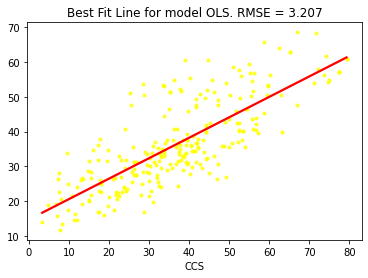

In [22]:
plotBestFitLine(testY,p_lr,"OLS",rmse_lr)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


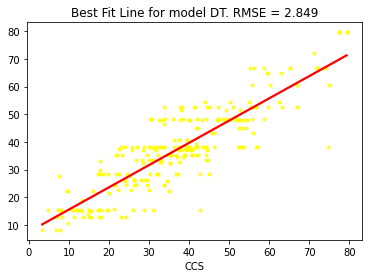

In [24]:
plotBestFitLine(testY,p_dt,"DT",rmse_dt)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


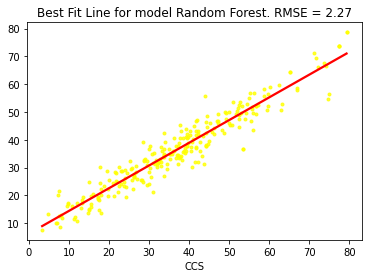

In [27]:
plotBestFitLine(testY,p_rf,"Random Forest",rmse_rf)